# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [3]:
# ===== Twoja implementacja tutaj =====

#1)

A, b = main.spare_matrix_Abt(50, 12)
A_sq, b_sq = main.square_from_rectan(A,b)
x1 = np.linalg.solve(A_sq, b_sq)

#2)

x2 = np.linalg.lstsq(A, b)[0]

#3)

Q,R = np.linalg.qr(A)
y = Q.T @ b
x3 = np.linalg.solve(R,y)

#4)

U, S, Vt = np.linalg.svd(A, full_matrices=False)
x4 = Vt.T @ np.diag(1/S) @ U.T @ b


print(x1,'\n')
print(x2,'\n')
print(x3,'\n')
print(x4)

[ 9.99999973e-01  7.87436649e-06 -8.00029484e+00  4.32313845e-03
  1.06337679e+01  1.47582860e-01 -6.10578772e+00  7.66441836e-01
  6.97307038e-01  7.40518287e-01 -6.80965844e-01  1.43455873e-01] 

[ 1.00000000e+00 -4.22743385e-07 -7.99998124e+00 -3.18763318e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160319e-02
  1.69360697e+00  6.03210332e-03 -3.74241701e-01  8.80405757e-02] 

[ 1.00000000e+00 -4.22743396e-07 -7.99998124e+00 -3.18763328e-04
  1.06694308e+01 -1.38202903e-02 -5.64707562e+00 -7.53160342e-02
  1.69360697e+00  6.03210127e-03 -3.74241700e-01  8.80405756e-02] 

[ 1.00000000e+00 -4.22743407e-07 -7.99998124e+00 -3.18763330e-04
  1.06694308e+01 -1.38202905e-02 -5.64707562e+00 -7.53160351e-02
  1.69360698e+00  6.03210065e-03 -3.74241700e-01  8.80405755e-02]


In [ ]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  8.679e-08
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  15.64 μs ± 4.465 μs per loop 
Druga metoda    :  35.55 μs ± 4.073 μs per loop 
Trzecia metoda  :  28.63 μs ± 7.677 μs per loop 
Czwarta metoda  :  47.89 μs ± 6.177 μs per loop 

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 124.59 MiB, increment: 0.00 MiB
Druga metoda    :  peak memory: 124.59 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 139.42 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 140.44 MiB, increment: 0.00 MiB


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [3]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

0.7860987817546511 -3.5036358485220513
3405.1374067428474  - suma kwadratów reszt
16.11766927944094  - średnia reszt


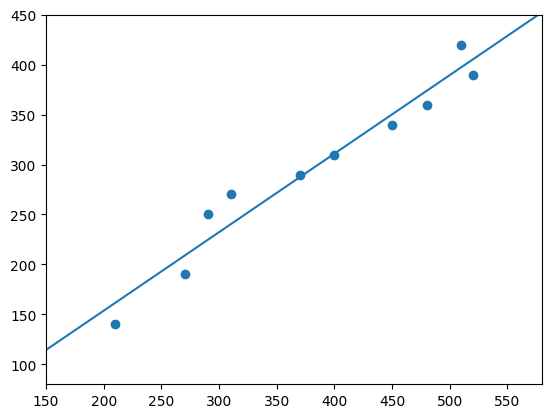

In [ ]:
# ===== Twoja implementacja tutaj =====
b = (sum(w)*sum(x**2 for x in d)-sum(d)*np.dot(d,w))/(len(w)*sum(x**2 for x in d)-(sum(d))**2)
a = (len(w)*np.dot(d,w)-sum(d)*sum(w))/(len(w)*sum(x**2 for x in d)-(sum(d))**2)
print(a,b)
plt.figure
plt.scatter(d,w)

x = np.linspace(0,600)
y = a*x+b
plt.plot(x,y)
plt.xlim(150,580)
plt.ylim(80,450)

err_arr = [y_i-b-a*x_i for y_i, x_i in zip(w,d)]
err_sse = sum(e**2 for e in err_arr)
err_avg = sum(abs(e) for e in err_arr)/10
print(err_sse,' - suma kwadratów reszt')
print(err_avg,' - średnia reszt')

# Lepszy wynik można uzyskać przyjmując model inny niż liniowy. 

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

In [55]:
# ===== Twoja implementacja tutaj =====

#1)

x1 = np.random.normal(0,1,[100,1])
x2 = np.random.normal(0,1,[100,1])
e = np.random.normal(0,1,[100,1])

y = x1 - 0.5*x2 + e + 2

[[1.99742445]
 [0.97558878]]


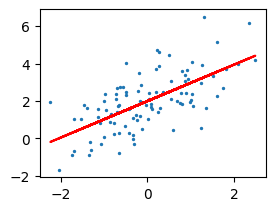

In [56]:
#2.1. y = a + x1

Z1 = np.concatenate([np.ones([100,1]),x1], 1)

Q,R = np.linalg.qr(Z1)
qy1 = Q.T @ y
b1 = sp.linalg.solve_triangular(R,qy1)

y1 = b1[0] + b1[1]*x1
norm1 = main.residual_norm(Z1, b1, y)

plt.figure
plt.subplot(2,2,1)
plt.scatter(x1,y,s=2)
plt.plot(x1,y1,'r')
print(b1)

[[ 1.97773733]
 [-0.50447028]]


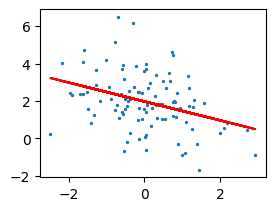

In [57]:
#2.2. y = a + x2

Z2 = np.concatenate([np.ones([100,1]),x2], 1)

Q,R = np.linalg.qr(Z2)
qy2 = Q.T @ y
b2 = sp.linalg.solve_triangular(R,qy2)

y2 = b2[0] + b2[1]*x2
norm2 = main.residual_norm(Z2, b2, y)

plt.figure
plt.subplot(2,2,2)
plt.scatter(x2,y,s=2)
plt.plot(x2,y2,'r')
print(b2)

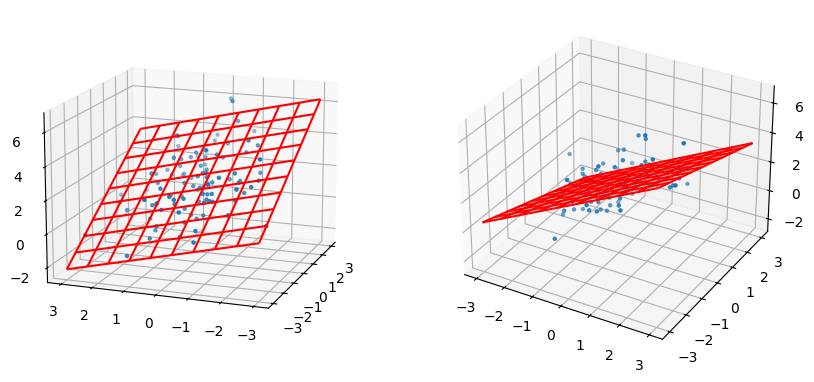

In [92]:
#2.3. y = a + x1 + x2

Z3 = np.concatenate([np.ones([100,1]),x1,x2], 1)

Q,R = np.linalg.qr(Z3)
qy3 = Q.T @ y
b3 = sp.linalg.solve_triangular(R,qy3)

y2 = b3[0] + b3[1]*x1 + b3[2]*x2
norm3 = main.residual_norm(Z3, b3, y)

fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(3, 2, 3, projection='3d')
ax2 = fig.add_subplot(3, 2, 4, projection='3d')

x_ax, y_ax = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
y3 = b3[0] + b3[1] * x_ax + b3[2] * y_ax

ax1.plot_wireframe(x_ax, y_ax, y3, color='r')
ax1.scatter(x1, x2, y, s=5)
ax1.view_init(15, 200, 0)

ax2.plot_wireframe(x_ax, y_ax, y3, color='r')
ax2.scatter(x1, x2, y, s=5)


In [ ]:
#2.3. y = a + x1 + x2 + x1*x2

Z4 = np.concatenate([np.ones([100,1]),x1,x2,x1*x2], 1)

Q, R = np.linalg.qr(Z4)
y_q = Q.T @ y
b4 = sp.linalg.solve_triangular(R, y_q)

y4 = b4[0] + b4[1] * x1 + b4[2] * x2 + b4[3] * x1 * x2
norm4 = main.residual_norm(Z4, b4, y)


None None None None


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)